<a href="https://colab.research.google.com/github/ariefprasetyohadi/Business-Analytics/blob/main/Transportation_churn_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
# common
import os
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# splitting the data
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics




# 1.Importing the data

In [178]:
# import data
path = 'https://raw.githubusercontent.com/ariefprasetyohadi/Business-Analytics/refs/heads/main/Customertravel.csv'
df = pd.read_csv(path)

In [179]:
# check for null values
df.isna().sum()

,0
Age,0
FrequentFlyer,0
AnnualIncomeClass,0
ServicesOpted,0
AccountSyncedToSocialMedia,0
BookedHotelOrNot,0
Target,0


In [180]:
df.shape

(954, 7)

In [181]:
# view the imported dataframe
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [182]:
df.groupby('Target').describe()

Age                                                     \
        count       mean       std   min   25%   50%   75%   max   
Target                                                             
0       730.0  32.352055  3.209323  27.0  30.0  31.0  35.0  38.0   
1       224.0  31.316964  3.620133  27.0  28.0  30.0  35.0  38.0   

       ServicesOpted                                               
               count      mean       std  min  25%  50%  75%  max  
Target                                                             
0              730.0  2.402740  1.554495  1.0  1.0  2.0  3.0  6.0  
1              224.0  2.549107  1.763430  1.0  1.0  2.0  4.0  6.0

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [184]:
# replace replace <Men's aparel> with <Men's Apparel>

df['FrequentFlyer'] = df['FrequentFlyer'].replace("No Record", "No")

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


# 2. Correlation



In [186]:
df0 = df[['Age', 'ServicesOpted', 'Target']]

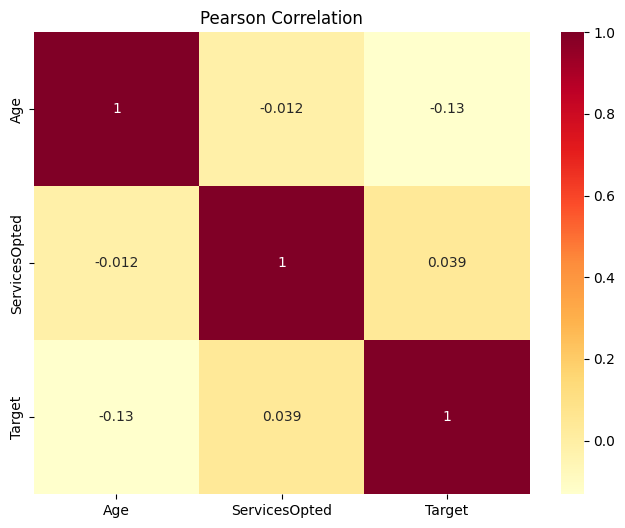

In [187]:
#heatmap correlation
plt.figure(figsize = (8,6))
sns.heatmap(df0.corr(), annot = True, cmap = 'YlOrRd')
plt.title("Pearson Correlation")
plt.show()

In [188]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=[ 'Target' ],
               inplace=True)

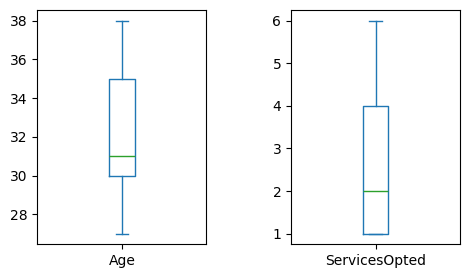

In [189]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

In [190]:
numeric = df_to_plot.columns
numeric

Index(['Age', 'ServicesOpted'], dtype='object')

<ipython-input-191-64a3166fce8c>:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



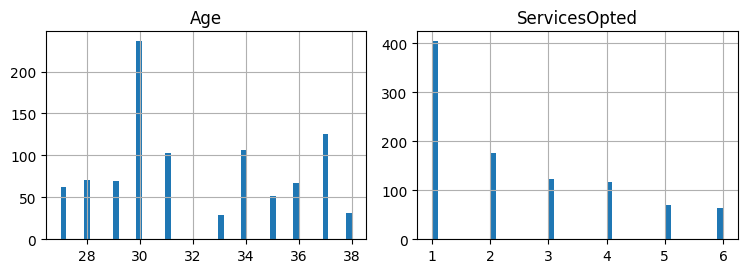

In [191]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df0.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

# 2.Data Visualization

##  AGE

<Axes: xlabel='Age', ylabel='count'>

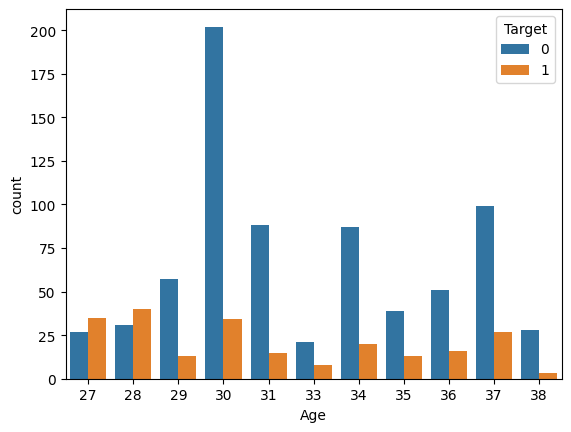

In [192]:
sns.countplot(data=df, x='Age', hue='Target')

In [193]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

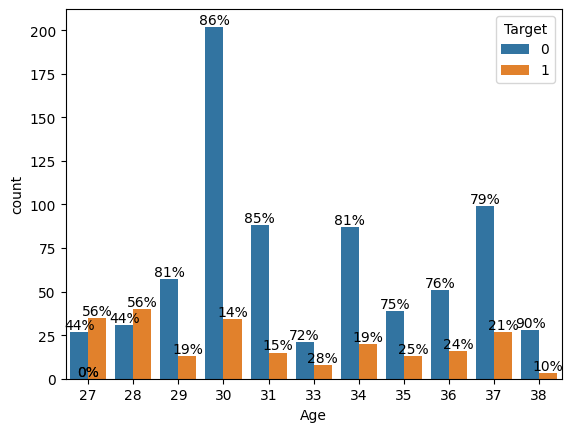

In [194]:
ax = sns.countplot(x='Age', hue='Target', data=df)
barPerc(df, 'Age', ax)

In [195]:
df.groupby('Target').describe()

Age                                                     \
        count       mean       std   min   25%   50%   75%   max   
Target                                                             
0       730.0  32.352055  3.209323  27.0  30.0  31.0  35.0  38.0   
1       224.0  31.316964  3.620133  27.0  28.0  30.0  35.0  38.0   

       ServicesOpted                                               
               count      mean       std  min  25%  50%  75%  max  
Target                                                             
0              730.0  2.402740  1.554495  1.0  1.0  2.0  3.0  6.0  
1              224.0  2.549107  1.763430  1.0  1.0  2.0  4.0  6.0

In [196]:
df['AnnualIncomeClass'].unique()

array(['Middle Income', 'Low Income', 'High Income'], dtype=object)

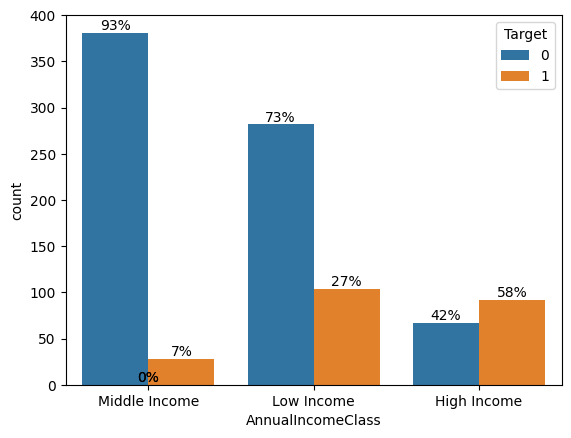

In [197]:
ax = sns.countplot(x='AnnualIncomeClass', hue='Target', data=df)
barPerc(df, 'AnnualIncomeClass', ax)

Category : 0 (Low Income), 1 (Middle Income), 2 (High Income)
Middle Income people travel more than High Income, there will be may reason behind it like they don't have enough time to travel they are busy in their work to earn more money or anything else also happens

<Axes: xlabel='AnnualIncomeClass', ylabel='Age'>

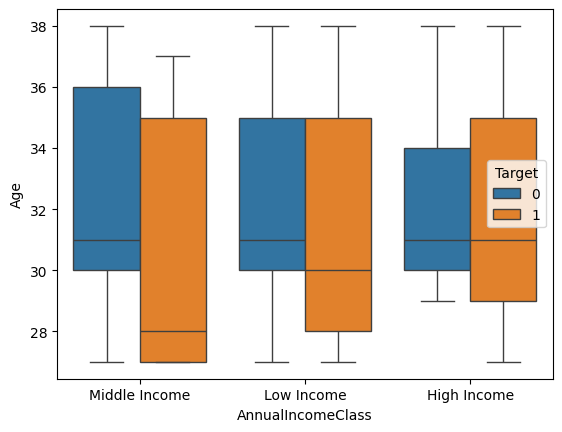

In [198]:
sns.boxplot(data =df, x='AnnualIncomeClass', y='Age', hue='Target')

# Income yang lebih tinggi cenderung menerima/membeli penawaran campaign

In [199]:
df['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

In [200]:
import plotly.express as px

In [201]:
fig = px.histogram(df,x='AnnualIncomeClass',color='FrequentFlyer')
fig.show()

In [202]:
df['ServicesOpted'].value_counts()

,count
ServicesOpted,
1,404
2,176
3,124
4,117
5,69
6,64


In [203]:
fig = px.histogram(df,x='AnnualIncomeClass',color='ServicesOpted')
fig.show()

In [204]:
fig = px.histogram(df,x='AnnualIncomeClass',color='BookedHotelOrNot')
fig.show()

Mainly Low Income Class people not booking hotel while travelling

And very low amount of High Income Clss booked hotels

Middle Income people travel more than High Income, there will be may reason behind it like they don't have enough time to travel they are busy in their work to earn more money or anything else also happens

Note : Company need to focus on how they can attract High Income family or people to their travelling plan and also attract Low Income people by provind jaw dropping deals or offers

As per the data Middle Income class are not a FrequentFlyer

In [205]:
df['ServicesOpted'].value_counts()

,count
ServicesOpted,
1,404
2,176
3,124
4,117
5,69
6,64


Mainly Low Income Class people not booking hotel while travelling

And very low amount of High Income Clss booked hotels

In [206]:
#transform categorical variable
cleanup_nums = {'FrequentFlyer': {'No': 0, 'Yes': 1},
                'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2},
                'AccountSyncedToSocialMedia': {'No':0, 'Yes': 1},
                'BookedHotelOrNot': {'No': 0, 'Yes': 1}}

In [207]:
df1 = df.replace(cleanup_nums)
df1.head()

<ipython-input-207-b929d7cbd704>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,1,6,0,1,0
1,34,1,0,5,1,0,1
2,37,0,1,3,1,0,0
3,30,0,1,2,0,0,0
4,30,0,0,1,0,0,0


In [208]:
#split data
X = df1.drop('Target', axis = 1)
y = df1['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(667, 6)
(667,)
(287, 6)
(287,)


#Classification Model

In [209]:
#prepare models
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel = 'linear', gamma = 'auto', C = 5, probability = True),
    LinearSVC(),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Data Extraction

In [210]:
#report models
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')

    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")

    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)  # Concatenate and reset index

# If 'log' doesn't exist yet:
if log is None:
    log = log_entry.copy()  # Create a new DataFrame from the first entry

print("=" * 30)

<ipython-input-210-82ed46dd77e3>:22: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



KNeighborsClassifier
****Results****
Accuracy: 87.1080%
Log Loss: 4.646742771419284


SVC
****Results****
Accuracy: 82.2300%
Log Loss: 6.404969766010365


LinearSVC
****Results****
Accuracy: 83.6237%
Log Loss: 5.902619196127199


DecisionTreeClassifier
****Results****
Accuracy: 84.6690%
Log Loss: 5.525856268714825




[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


RandomForestClassifier
****Results****
Accuracy: 87.8049%
Log Loss: 4.3955674864777015


XGBClassifier
****Results****
Accuracy: 88.5017%
Log Loss: 4.144392201536118


AdaBoostClassifier
****Results****


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 85.0174%
Log Loss: 5.400268626244033


GradientBoostingClassifier
****Results****
Accuracy: 89.5470%
Log Loss: 3.7676292741237445


GaussianNB
****Results****
Accuracy: 79.7909%
Log Loss: 7.284083263305905


LinearDiscriminantAnalysis
****Results****
Accuracy: 82.9268%
Log Loss: 6.153794481068781


QuadraticDiscriminantAnalysis
****Results****
Accuracy: 83.2753%
Log Loss: 6.02820683859799




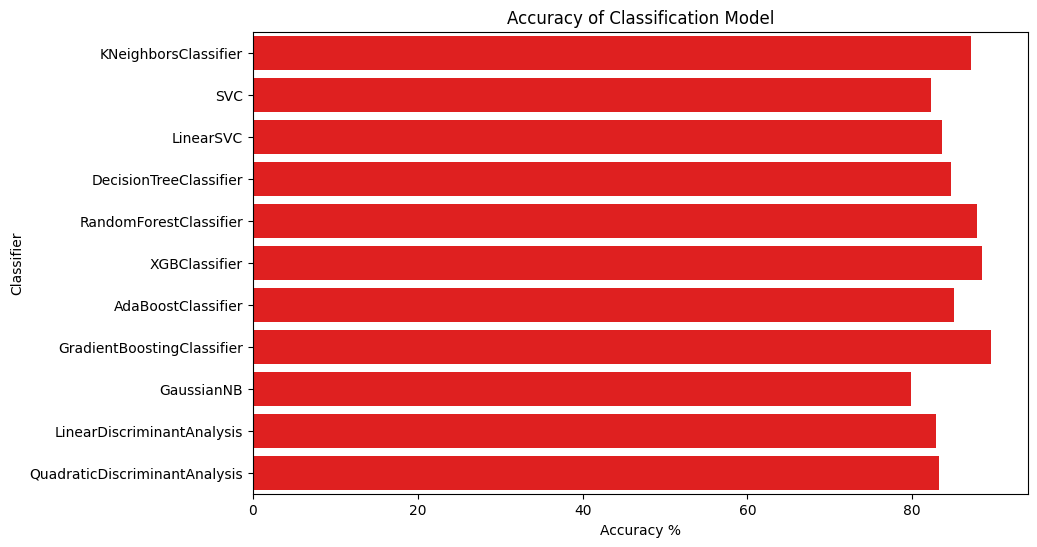

In [211]:
#visualize accuracy models
plt.figure(figsize = (10,6))
sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "red")
plt.xlabel('Accuracy %')
plt.title('Accuracy of Classification Model')
plt.show()
sns.set_color_codes("muted")
plt.show()

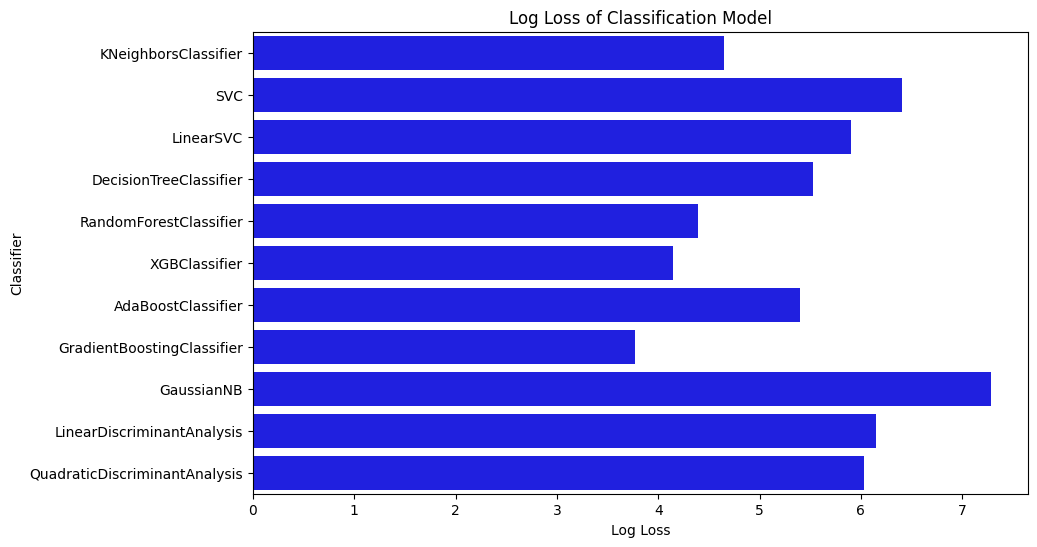

In [212]:
#visualize log loss models
plt.figure(figsize = (10,6))
sns.barplot(x = 'Log Loss', y = 'Classifier', data = log, color = "blue")
plt.xlabel('Log Loss')
plt.title('Log Loss of Classification Model')
plt.show()

## Extreme Gradient Boosting Model is the best score result

In [213]:
#build model
xgb = XGBClassifier()
%time xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

CPU times: user 109 ms, sys: 892 µs, total: 110 ms
Wall time: 86.2 ms


0.8850174216027874

In [214]:
#prediction
y_pred = xgb.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1]


In [215]:
#report of MSE & RMSE
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE: '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE: '+ str(rmse))

MSE: 0.11498257839721254
RMSE: 0.33909081143141073


[[208  16]
 [ 17  46]]


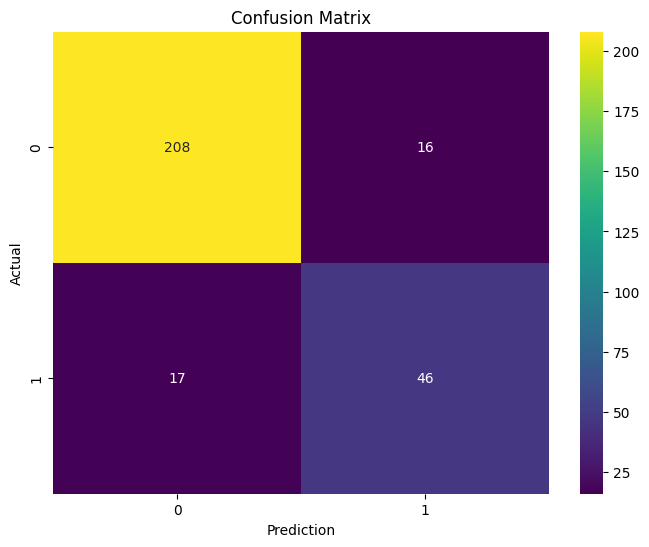

In [216]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [217]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       224
           1       0.74      0.73      0.74        63

    accuracy                           0.89       287
   macro avg       0.83      0.83      0.83       287
weighted avg       0.88      0.89      0.88       287



# Visualization

In [230]:
#transform Frequent Flyer
df1.FrequentFlyer[df1['FrequentFlyer'] == 0] = 'No'
df.FrequentFlyer[df1['FrequentFlyer'] == 1] = 'Yes'

#transform Annual Income Class
df1.AnnualIncomeClass[df1['AnnualIncomeClass'] == 0] = 'Low Income'
df1.AnnualIncomeClass[df1['AnnualIncomeClass'] == 1] = 'Middle Income'
df1.AnnualIncomeClass[df1['AnnualIncomeClass'] == 2] = 'High Income'

#transform Account Synced To Social Media
df1.AccountSyncedToSocialMedia[df1['AccountSyncedToSocialMedia'] == 0] = 'No'
df1.AccountSyncedToSocialMedia[df1['AccountSyncedToSocialMedia'] == 1] = 'Yes'

#transform Booked Hotel Or Not
df1.BookedHotelOrNot[df1['BookedHotelOrNot'] == 0] = 'No'
df1.BookedHotelOrNot[df1['BookedHotelOrNot'] == 1] = 'Yes'

#transform target
df1.Target[df1['Target'] == 0] = 'Customer Does Not Churn'
df1.Target[df1['Target'] == 1] = 'Customer Churn'
df1.head()


<ipython-input-230-719fe07e8b9b>:2: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-230-719fe07e8b9b>:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. 

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,Customer Does Not Churn
1,34,1,Low Income,5,Yes,No,Customer Churn
2,37,No,Middle Income,3,Yes,No,Customer Does Not Churn
3,30,No,Middle Income,2,No,No,Customer Does Not Churn
4,30,No,Low Income,1,No,No,Customer Does Not Churn


<ipython-input-233-e5a47b66dc58>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




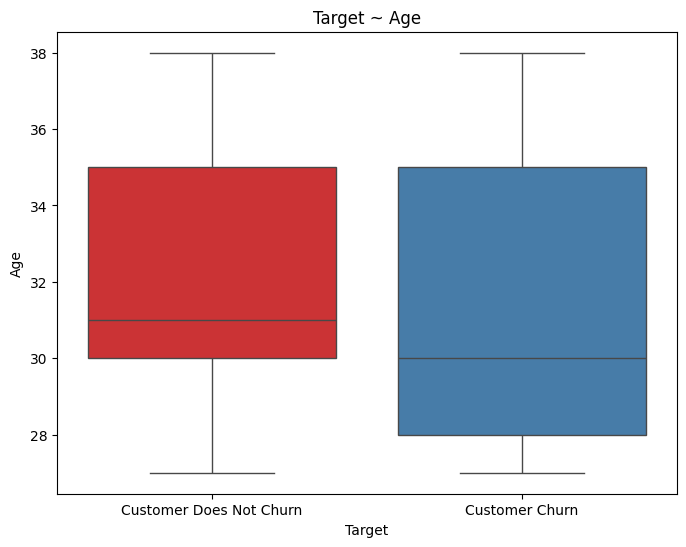

In [233]:
#visualize target ~ age
plt.figure(figsize = (8,6))
sns.boxplot(data = df1, x = 'Target', y = 'Age', palette = 'Set1')
plt.title("Target ~ Age")
plt.show()

In [220]:
#group frequent flyer & target
flyer_target = df1.groupby(['Target', 'FrequentFlyer']).size().reset_index(name = 'Count')
print(flyer_target)

   Target  FrequentFlyer  Count
0       0              0    591
1       0              1    139
2       1              0     77
3       1              1    147


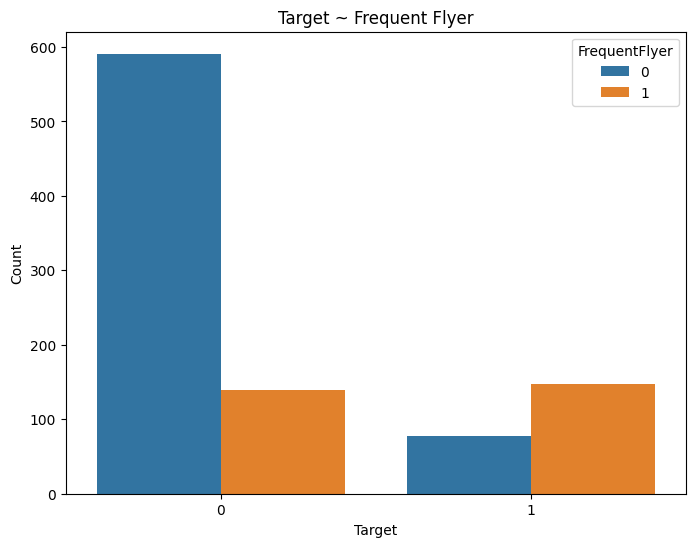

In [221]:
#visualize frequent flyer ~ target
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'FrequentFlyer', data = flyer_target)
plt.title("Target ~ Frequent Flyer")
plt.show()

In [222]:
#group annual income class & target
income_target = df1.groupby(['Target', 'AnnualIncomeClass']).size().reset_index(name = 'Count')
print(income_target)

   Target  AnnualIncomeClass  Count
0       0                  0    282
1       0                  1    381
2       0                  2     67
3       1                  0    104
4       1                  1     28
5       1                  2     92


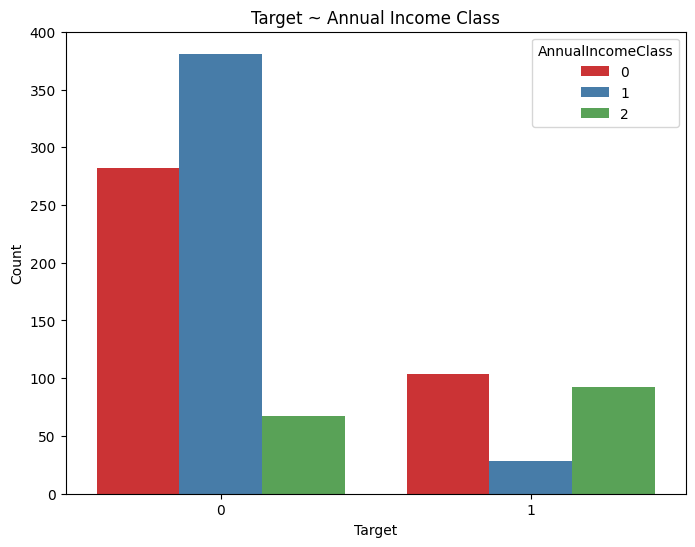

In [223]:
#visualize annual income class ~ target
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'AnnualIncomeClass', data = income_target, palette = 'Set1')
plt.title("Target ~ Annual Income Class")
plt.show()

<ipython-input-224-aadad97a5260>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




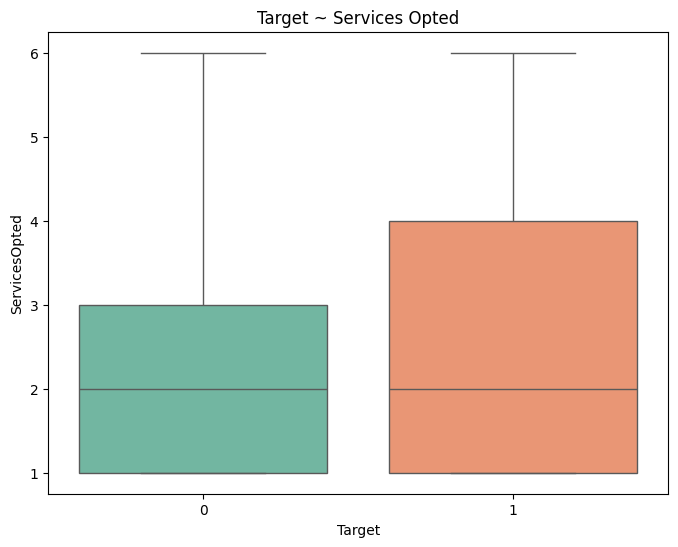

In [224]:
#visualize target ~ services opted
plt.figure(figsize = (8,6))
sns.boxplot(data = df1, x = 'Target', y = 'ServicesOpted', palette = 'Set2')
plt.title("Target ~ Services Opted")
plt.show()

In [225]:
#group account synced to social media ~ target
acc_target = df1.groupby(['Target', 'AccountSyncedToSocialMedia']).size().reset_index(name = 'Count')
print(acc_target)

   Target  AccountSyncedToSocialMedia  Count
0       0                           0    469
1       0                           1    261
2       1                           0    125
3       1                           1     99


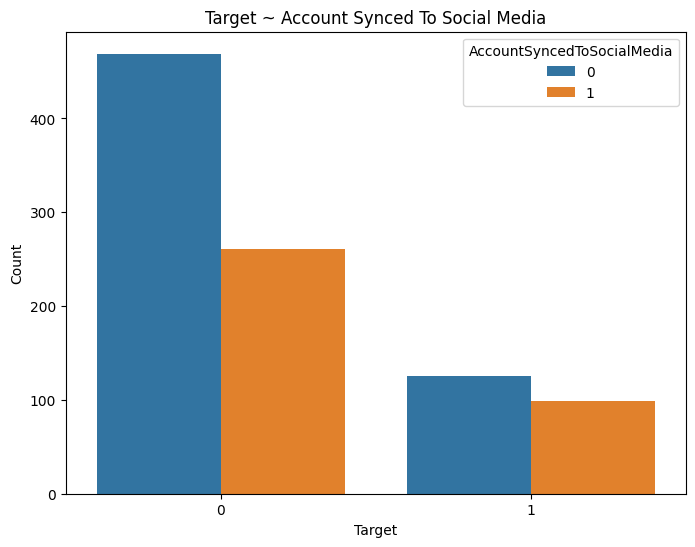

In [226]:
#visualize account synced to social media ~ target
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'AccountSyncedToSocialMedia', data = acc_target)
plt.title("Target ~ Account Synced To Social Media")
plt.show()

In [227]:
#group booked hotel or not & target
book_target = df1.groupby(['Target', 'BookedHotelOrNot']).size().reset_index(name = 'Count')
print(book_target)

   Target  BookedHotelOrNot  Count
0       0                 0    400
1       0                 1    330
2       1                 0    176
3       1                 1     48


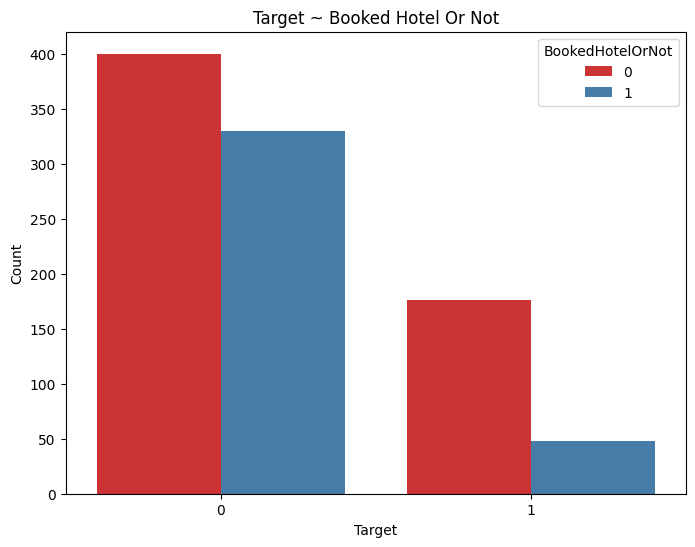

In [228]:
#visualize booked hotel or not ~ target
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'BookedHotelOrNot', data = book_target, palette = 'Set1')
plt.title("Target ~ Booked Hotel Or Not")
plt.show()

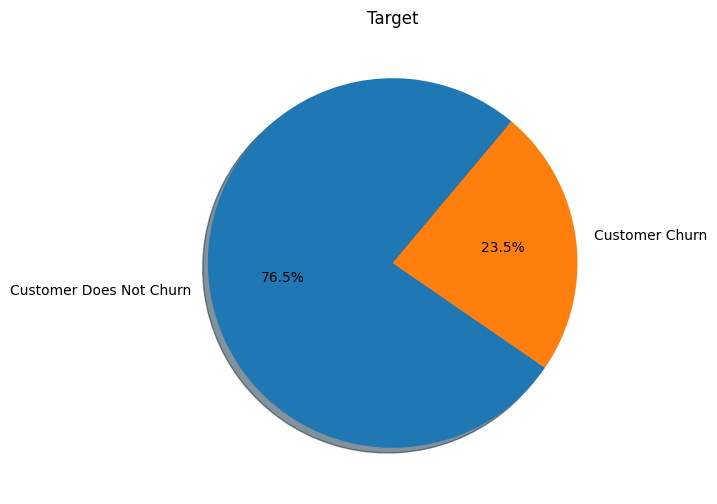

In [234]:
#visualize Target
plt.figure(figsize = (8,6))
x = [np.count_nonzero(df1['Target'] == 'Customer Does Not Churn'),
    np.count_nonzero(df1['Target'] == 'Customer Churn')]
activities = ['Customer Does Not Churn', 'Customer Churn']
plt.pie(x, labels = activities, startangle = 50, autopct = '%.1f%%', shadow = True)
plt.title("Target")
plt.show()